**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Hongan Yu
- Meiyan Liu
- He Chen
- Linlin Zheng


# Research Question

- We aim to investigate the factors that influences the median prices of single-family homes in California. Specifically, we will analyze the impact of crime rate, population size, median household incomes, and expenditures. This study will determine which of these variables has the most significant effect on the prices of single-family homes and provide insights for potential future price changes based on the variable with strongest correlation. 

## Background and Prior Work

California, in particular, stands out as one of the most expensive states in the United States concerning housing market costs. In 2024, 7 out of the top 15 most expensive housing markets are located in California. Alarmingly, three of these seven markets have a remarkable one-year price increase exceeding 10%, with San Jose experiencing the highest surge at 12.9%. This rapid escalation in housing prices highlights a pressing issue that demands immediate attention(1). As a group, we recognize the growing trends in the housing market across the United States. However, due to the amount of available data, we've chosen to focus our project specifically on the housing market statistics in California.

The housing market is deeply intertwined with people's lives, significantly affecting their well-being and financial stability. Rising housing costs can lead to increased stress and pressure as individuals and families struggle to afford basic living expenses. Moreover, the lack of affordable housing contributes to the growing number of homeless individuals(2). As prices surge, more are priced out of the market, leading to housing insecurity and homelessness.

- **Housing price** is a critical component of economic stability and individual well-being, influenced by a complex interplay of factors(3). Our group chose the following impact factors for our house price study because they are the most significant determinants influencing housing prices. Understanding these factors allows for a comprehensive analysis of the housing market, particularly in regions like California where housing costs are a pressing concern.

- **Crime Rate**: Crime rates within a city often have an effect on whether an individual would want to live or visit the city. We believe that this would also have an impact on the housing prices in a city.

- **Population**: Population density plays a significant role in determining housing prices. A large population often leads to increased demand for housing, particularly in urban areas, driving up the cost due to limited supply. Regions with higher populations may also experience heightened competition for available homes, contributing further to the inflation of housing prices.

- **Income**: The average salary or income levels of residents influence their purchasing power in the housing market. Higher income levels enable individuals and families to afford more expensive homes, increasing demand in higher price brackets and potentially driving up overall market prices.

- **Expenditures**: High expenditures reflect a strong economic environment. For example, areas with high consumer expenditures attract more businesses and amenities, further increasing the desirability and cost of living. Elevated spending on infrastructure and public amenities can make an area more attractive, driving up property values due to better living conditions.

By integrating these variables into our analysis, our study aims to provide a thorough understanding of which factors have the most significant impact on housing prices. The importance of investigating these variables lies in their potential to inform effective policies that can address housing affordability challenges. It is also essential to consider the methods and tools used for such analysis. Common statistical models include linear and multiple regression analyses, which help identify the relationships between housing prices and various independent variables. Visualization tools like scatter plots, histograms, and correlation matrices can provide a clearer understanding of data patterns and interactions.

References (include links):
- 1) Homes Sell for Over $1 Million in the Most Expensive Housing Markets: https://smartasset.com/data-studies/most-expensive-housing-markets-2024
- 2) Californians: Here’s why your housing costs are so high in 2024: https://calmatters.org/explainers/california-housing-costs-explainer/
- 3) Shiller, R. (2007). Understanding recent trends in house prices and home ownership. https://doi.org/10.3386/w13553 
- 4) Highlights From the Profile of Home Buyers and Sellers: https://www.nar.realtor/research-and-statistics/research-reports/highlights-from-the-profile-of-home-buyers-and-sellers 


# Hypothesis


## Factors:
**Inflation:**
Higher inflation rates lead to an increase in California housing prices.

**Mortgage Rate:**
Higher mortgage rates cause a decrease in California housing prices.

**Population:**
An increase in population leads to an increase in California housing prices.

**Crime Rate:**
Higher crime rates lead to a decrease in California housing prices.

**Average Income:**
Higher average income levels lead to an increase in California housing prices.

## Hypothesis:
We hypothesize that California housing prices are  impacted by different factors, including inflation, mortgage rates, population growth, crime rates, and median household income. We specifically believe that median household income has the greatest effect on housing prices, as it directly influences a family's ability to save and spend. In general, the higher a family's income are, the more they are likely to invest in purchasing a home. Our research indicates that well developed cities such as Los Angeles and San Francisco, typically has higher average incomes alongside higher housing prices. Therefore, we hypothesize that median household income will have the strongest correlation with housing prices.

## Null Hypothesis:
Our null hypothesis would be that median household income does not have the strongest correlation with housing prices, there are other factors that affects the housing prices.

# Data

### Import all the tools needed

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind 
from pandas.plotting import scatter_matrix

## Data overview

For each dataset include the following information
- **Dataset #1 (House Prices in California)**
  - Dataset Name: California House Prices (2019)
  - Link to the dataset: https://homesbypasha.com/september-2019-home-sales-price-report-california-association-realtor
  - Number of observations: 58
  - Number of variables: 4(House Price)
- Description: This dataset includes house prices across various counties in California for 2019, which is a key indicator of the real estate market. The primary variable, "house price," is numerical and serves as a proxy for market demand and economic conditions. Preprocessing involves cleaning for missing or outlier values and aligning this dataset with others using county identifiers.
- **Dataset #2 (Population in California)**
  - Dataset Name: California Population Statistics (2019)
  - Link to the dataset: https://www.indexmundi.com/facts/united-states/quick-facts/california/population#table
  - Number of observations: 58
  - Number of variables: 2(Population)
- Description: This dataset provides population data for California counties, an important metric that affects housing demand. The "population" variable is numerical, representing the number of residents in each county. Preprocessing requires standardizing the data format and handling any null values to prepare for merging with other datasets.
- **Dataset #3 (Crime rate in California)**
  - Dataset Name: Crime Rate in California (2019)
  - Link to the dataset: https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/tables/table-10/table-10-state-cuts/california.xls
  - Number of observations: 57
  - Number of variables: 6(Crime Rate)
- Description: This dataset includes crime rates for California counties and is a critical factor influencing neighborhood desirability and housing prices. The "crime rate" variable is numerical and requires cleaning to address missing values and proper formatting. Preprocessing ensures consistency with other datasets by unifying county names.
- **Dataset #4 (Income in California)**
  - Dataset Name: Median Household Income in California (2019)
  - Link to the dataset: https://hdpulse.nimhd.nih.gov/data-portal/social/table?age=001&age_options=ageall_1&demo=00011&demo_options=income_3&race=00&race_options=race_7&sex=0&sex_options=sexboth_1&socialtopic=030&socialtopic_options=social_6&statefips=06&statefips_options=area_states
  - Number of observations: 66
  - Number of variables: 4(Median Household Income)
- Description: This dataset reflects median household income levels for different counties in California, a numerical variable indicative of purchasing power. Cleaning involves verifying numerical formatting and addressing any null entries.
- **Dataset #5 (Government Expenditures in California)**
  - Dataset Name: California Government Expenditures (2019)
  - Link to the dataset: https://counties.bythenumbers.sco.ca.gov/#!/year/2019/operating/0/entity_name
  - Number of observations: 57
  - Number of variables: 3(Expenditures)
- Description: This dataset details government expenditures across California counties and serves as a numerical variable for assessing public investment and infrastructure impact on property values. Preprocessing involves checking for missing data and ensuring compatibility with other datasets through county-based alignment.

To create a comprehensive dataset for analysis, all individual datasets will be merged using county identifiers as the common key. Data will be cleaned to handle null values and discrepancies, ensuring uniformity in county naming conventions and data types. This final unified dataset will facilitate a detailed analysis of the variables' collective impact on housing prices in California.


## Housing Prices Dataset

In [273]:
HousePrices = pd.read_csv('./HousingPrice.csv')
HousePrices

,State/Region/County,Median Sales Price Sept. 2019,Price Change MTM%,Sales Change MTM%
0,Calif. Single-family homes,605680,-1.9,-4.7
1,Calif. Condo/Townhomes,460000,-1.7,-2.1
2,Los Angeles Metro Area,545000,0.0,-4.8
3,Central Coast,695000,-0.4,-10.4
4,Central Valley,340250,-0.8,-4.6
5,Inland Empire,385000,1.3,-4.6
6,San Francisco Bay Area,880000,-2.2,-3.5
7,Alameda,910000,0.5,-11.1
8,Contra Costa,656000,2.5,0.9
9,Marin,1360000,1.9,15.0


## Crime Rates Dataset

In [274]:
CrimeRates = pd.read_csv('./CrimeRate.csv')
CrimeRates

,County,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault
0,Alameda,633,5,27,210,391
1,Butte,283,5,32,28,218
2,Contra Costa,332,8,28,89,207
3,El Dorado,173,4,8,47,94
4,Fresno,1082,14,38,102,928
5,Imperial,211,2,11,7,191
6,Kern,2864,29,244,433,2158
7,Kings,125,2,19,19,85
8,Los Angeles,5564,68,300,1443,3753
9,Madera,457,1,34,14,408


# Population Dataset

In [275]:
Population = pd.read_csv('./CountyPopulations.csv')
column_name4 = ['County', 'Population']
Population.columns = column_name4
Population

,County,Population
0,Alameda,1666753
1,Alpine,1101
2,Amador,39383
3,Butte,231256
4,Calaveras,45602
5,Colusa,21627
6,Contra Costa,1150215
7,Del Norte,27828
8,El Dorado,190678
9,Fresno,994400


## Income Dataset

In [276]:
Income = pd.read_csv('./CountyIncome.csv')
Income


,County,FIPS,Value (Dollars),Rank within US (of 3142 counties)
0,United States,0.0,"75,149",NaN
1,California,6000.0,"91,905",6 of 52
2,Trinity County,6105.0,"47,317","2,704"
3,Imperial County,6025.0,"53,847","2,245"
4,Siskiyou County,6093.0,"53,898","2,243"
...,...,...,...,...
61,HDPulse: An Ecosystem of Minority Health and H...,NaN,NaN,NaN
62,Notes:,NaN,NaN,NaN
63,Source: Demographic data provided by the Censu...,NaN,NaN,NaN
64,For more information about Income (Median hous...,NaN,NaN,NaN


## Expenditures Dataset

In [277]:
Expenditures = pd.read_csv('./Expenditures.csv')
Expenditures

,County,Value,%
0,Los Angeles,28083917455,31.21%
1,Santa Clara,6552829345,7.28%
2,San Diego,5030257683,5.59%
3,Orange,4972108200,5.52%
4,Riverside,4900770123,5.45%
5,San Bernardino,4733902714,5.26%
6,Contra Costa,3542107990,3.94%
7,Sacramento,3529448000,3.92%
8,Alameda,3339008906,3.71%
9,Ventura,2252460149,2.50%



## Exploratory Data Analysis

### Cleaning Datasets

#### The cleaning process ensures that the datasets are prepared for meaningful analysis by removing unnecessary and irrelevant elements, ddressing missing values, and standardizing formats.

##### House price dataset: 
- Removed unused columns. 
- Standardized the column names to be descriptive and consistent.
- Replaced commas in numeric values to ensure proper data type conversion.
- Converted all numerical columns to a numeric data type.
- Set the County column as the index for easier merging and analysis.

In [278]:
HousePrices
column_name1 = ['County','Price','x','y']
HousePrices.columns = column_name1
HousePrices = HousePrices.drop(['x','y'],axis=1)
HousePrices.set_index('County',inplace=True)
HousePrices = HousePrices.replace(',','', regex=True)
HousePrices = HousePrices.apply(pd.to_numeric)
HousePrices

,Price
County,
Calif. Single-family homes,605680
Calif. Condo/Townhomes,460000
Los Angeles Metro Area,545000
Central Coast,695000
Central Valley,340250
Inland Empire,385000
San Francisco Bay Area,880000
Alameda,910000
Contra Costa,656000


##### Income Dataset
- Renamed columns for consistency and clarity.
- Removed the prefix "County" from entries in the - County column for better readability.
- Dropped unnecessary columns that are not relevant to the analysis.
- Set the County column as the index to facilitate merging with other datasets.
- Replaced commas in numeric values to ensure proper data conversion.
- Converted all columns to numeric data types to support calculations.
- Removed rows with missing or NaN values in the Income column to ensure data completeness.

In [279]:
column_name2 = ['County','x','Income','y']
Income.columns = column_name2
Income['County'] = Income['County'].str.replace(' County','')
Income = Income.drop(['x','y'],axis=1)
Income.set_index('County',inplace=True)
Income = Income.replace(',','', regex=True)
Income = Income.apply(pd.to_numeric)
Income = Income[Income['Income'].notna()]
Income


,Income
County,
United States,75149.0
California,91905.0
Trinity,47317.0
Imperial,53847.0
Siskiyou,53898.0
Modoc,54962.0
Lake,56259.0
Humboldt,57881.0
Tehama,59029.0


##### Crime Rate Dataset

- Renamed columns for uniformity and ease of understanding.
- Dropped irrelevant columns that do not contribute to the analysis.
- Set the County column as the index for consistency with other datasets.
- Converted all numerical columns to numeric data types.
- Removed rows with missing or NaN values in the CrimeCount column to ensure data reliability.

In [280]:
column_name3 = ['County','CrimeCount','a','b','c','d']
CrimeRates.columns = column_name3
CrimeRates = CrimeRates.drop(['a','b','c','d'],axis=1)
CrimeRates.set_index('County',inplace=True)
CrimeRates = CrimeRates.apply(pd.to_numeric)
CrimeRates = CrimeRates[CrimeRates['CrimeCount'].notna()]
CrimeRates



,CrimeCount
County,
Alameda,633
Butte,283
Contra Costa,332
El Dorado,173
Fresno,1082
Imperial,211
Kern,2864
Kings,125
Los Angeles,5564


##### Expenditures Dataset

- Dropped the column %, which is not required for the current analysis.
- Set the County column as the index for better alignment with other datasets.

In [281]:
Expenditures = Expenditures.drop(['%'],axis=1)
Expenditures.set_index('County',inplace=True)
Expenditures


,Value
County,
Los Angeles,28083917455
Santa Clara,6552829345
San Diego,5030257683
Orange,4972108200
Riverside,4900770123
San Bernardino,4733902714
Contra Costa,3542107990
Sacramento,3529448000
Alameda,3339008906


##### Population Dataset

- Set the County column as the index to streamline the merging process with other datasets.

In [282]:
Population.set_index('County',inplace=True)
Population

,Population
County,
Alameda,1666753
Alpine,1101
Amador,39383
Butte,231256
Calaveras,45602
Colusa,21627
Contra Costa,1150215
Del Norte,27828
El Dorado,190678


### Join Datasets

Combined all the cleaned datasets into a single, unified dataframe to prepare for our analysis. Using the 'County' column as the common key to join the datasets because it serves as a consistent identifier across all of them. By applying inner joins, we ensured that only counties with complete data in all datasets were included, maintaining the integrity and reliability of our analysis. Then sorted the resulting dataframe by Price in descending order to easily identify counties with the highest house prices. This step was crucial because it consolidated all the key variables—Price, Income, CrimeCount, Value, and Population—into one place, allowing us to analyze relationships and patterns effectively in the next phases of our project.


In [283]:
result = (HousePrices.join(Income, how = 'inner').join(CrimeRates, how = 'inner').join(Expenditures, how = 'inner').join(Population, how = 'inner'))
result.sort_values(by = 'Price', ascending = False)

,Price,Income,CrimeCount,Value,Population
County,,,,,
San Francisco,1545000,136689.0,670,7562672198,883305
San Mateo,1470000,149907.0,324,1988258994,769545
Marin,1360000,142019.0,63,690137856,259666
Santa Clara,1225000,153792.0,356,6552829345,1937570
Alameda,910000,122488.0,633,3339008906,1666753
Orange,830000,109361.0,247,4972108200,3185968
Santa Cruz,795000,104409.0,58,657637176,274255
Napa,787500,105809.0,69,390786557,139417
Santa Barbara,731500,92332.0,232,1039577506,446527


## Plotting Datasets


This code uses scatter_matrix from pandas.plotting to create a matrix of scatter plots for the result dataset, with a histogram on the diagonal. The purpose is to visualize the relationships between different variables ('Price', 'Income', 'CrimeCount') to identify any patterns, correlations, or outliers.

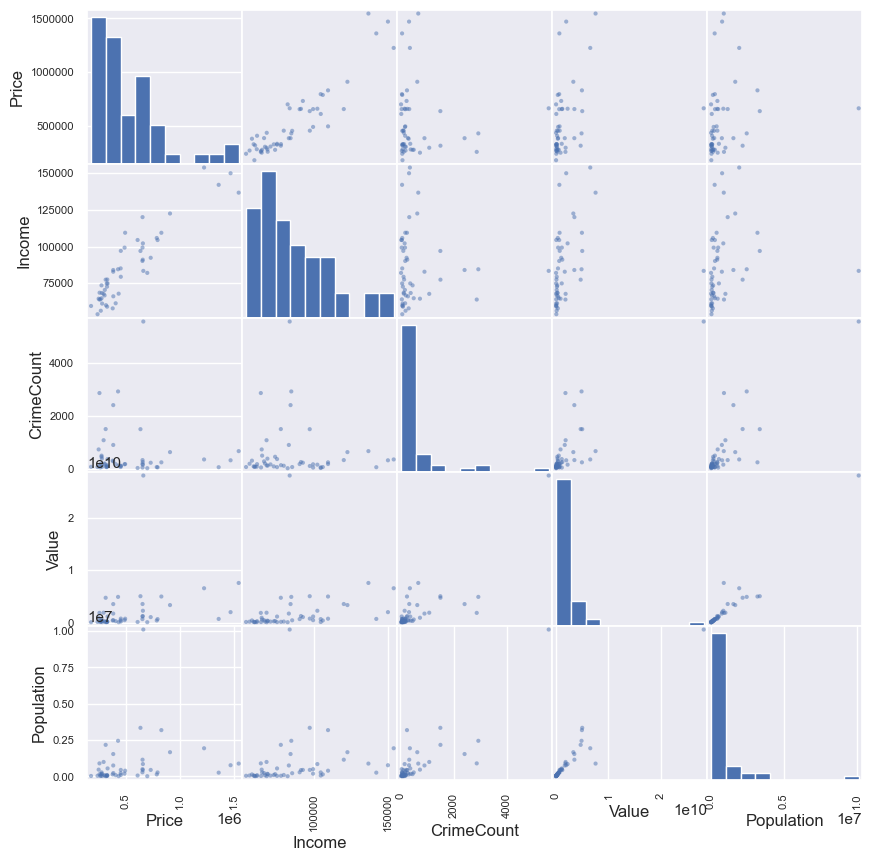

In [284]:
fig = scatter_matrix(result,figsize=(10,10), diagonal = 'hist')

## Find the All the relationships 

### **Relationship between House Price and Crime Rate**


This code uses Seaborn to create a bar plot that shows crime counts ('CrimeCount') for each county, sorted in descending order. The purpose is to visualize which counties have the highest crime rates.

From this graph, it is clear that Los Angeles, Riverside, and Kern counties have significantly higher crime counts compared to other counties, suggesting these areas have the highest crime rates.

<Axes: xlabel='CrimeCount', ylabel='County'>

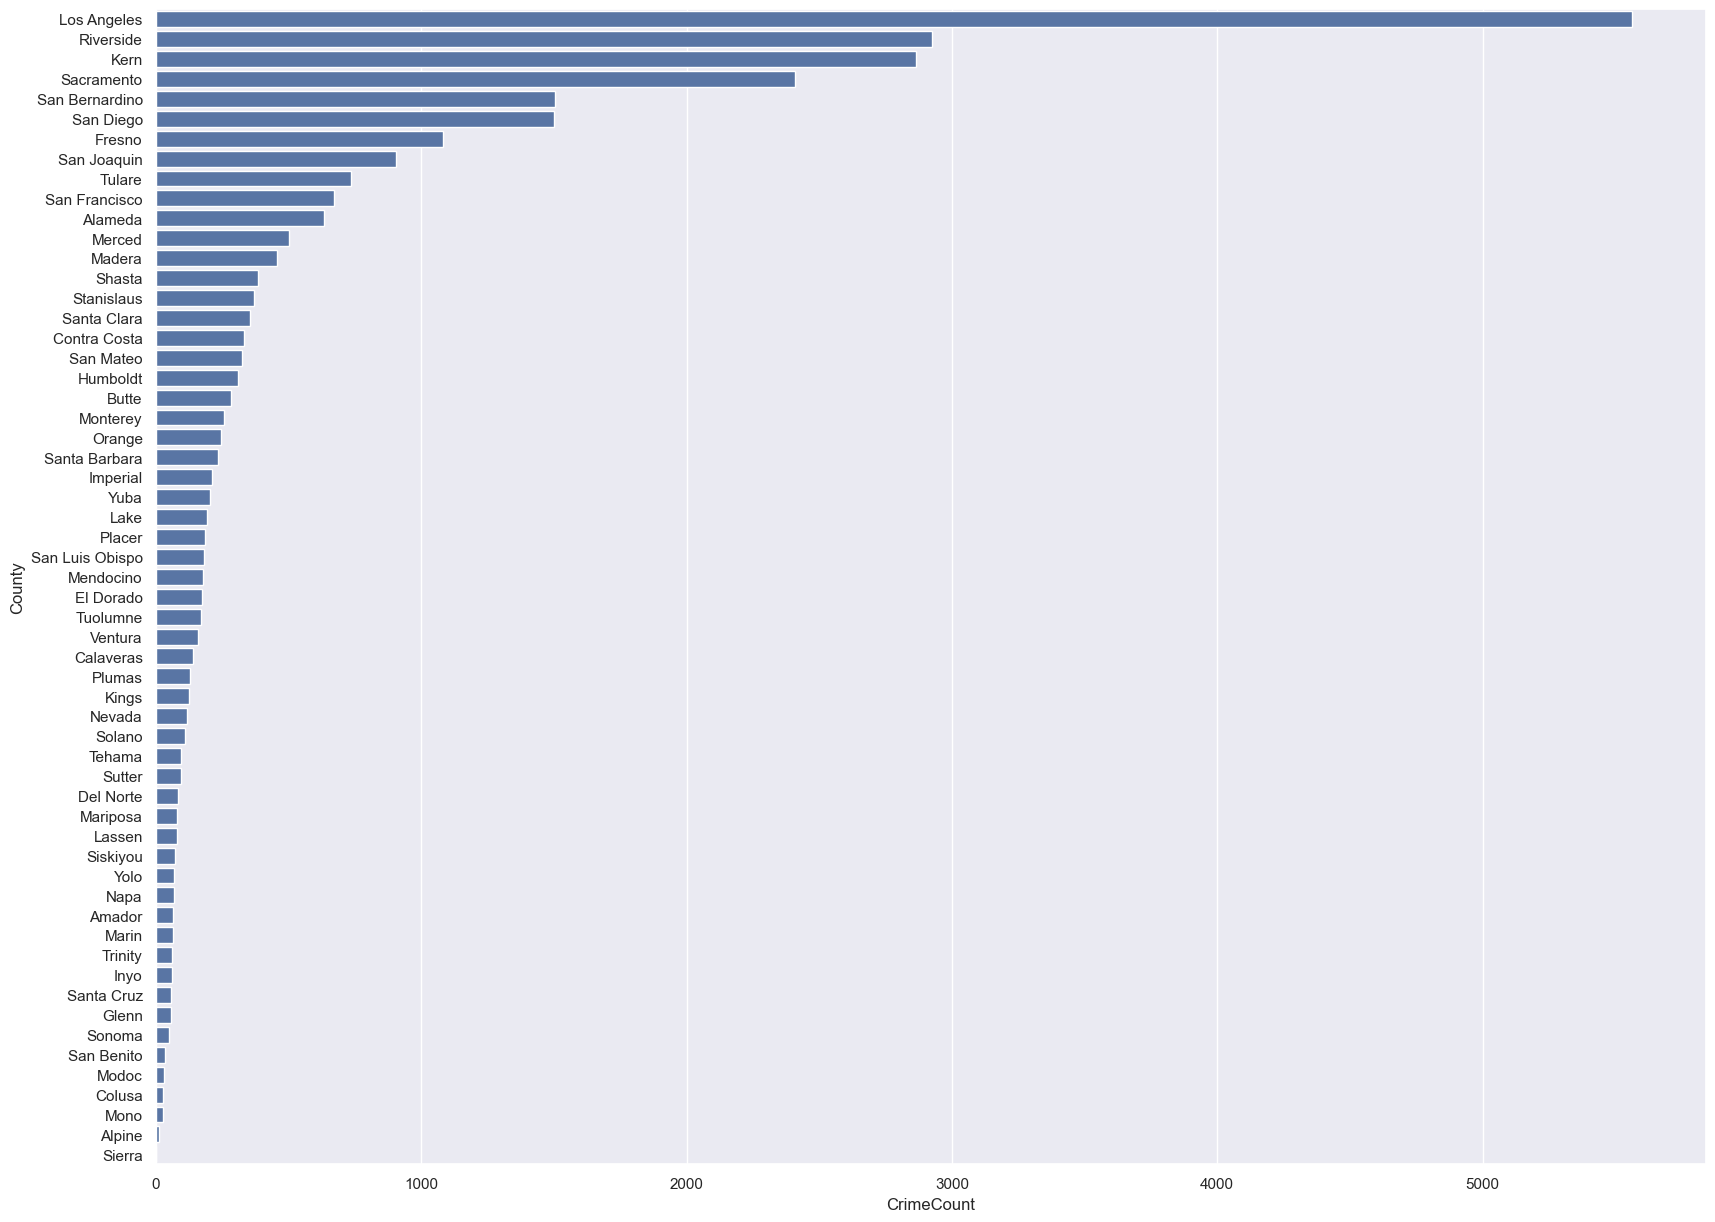

In [285]:
sns.set(font_scale= 0.01)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x="CrimeCount", y= "County", data=CrimeRates.sort_values(by='CrimeCount', ascending=False))


The following code creates a boxplot of the CrimeCount values using Seaborn. The purpose is to visualize the distribution and detect outliers in the crime rates across counties.

From the boxplot, it is evident that most counties have relatively low crime counts, clustered near the lower end of the scale. There are several significant outliers, indicating a few counties with exceptionally high crime rates compared to the majority.

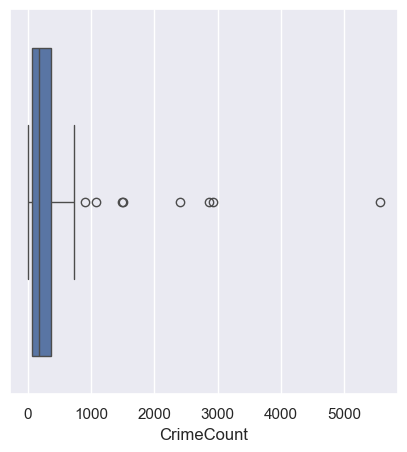

In [286]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.boxplot(x=CrimeRates['CrimeCount'])

We can see there are certain outliers, so we want to remove the outliers in the dataset

In [287]:
CrimeRates = CrimeRates[CrimeRates['CrimeCount'] < 900]

This code generates a scatter plot to visualize the relationship between CrimeCount and Price in the result dataset using Seaborn. The plot helps identify trends between crime rates and house prices.

From the scatter plot, it appears that areas with lower crime counts tend to have higher house prices, while areas with higher crime counts generally show lower house prices. This suggests an inverse relationship between crime rate and property prices.

<Figure size 800x800 with 0 Axes>

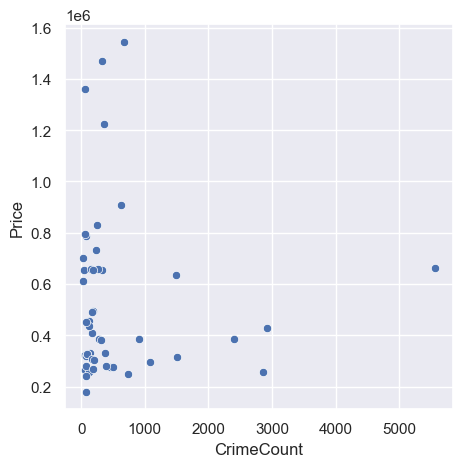

<Figure size 800x800 with 0 Axes>

In [288]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x = 'CrimeCount',y='Price', data=result)
#change the size of the plot
plt.figure(figsize=(8,8))

This code calculates the mean values for CrimeCount and Price from the result dataset and then performs an independent t-test to compare the two variables (h_crime and h_price). The resulting t-value and p-value help evaluate whether there's a significant difference between crime rates and property prices.

The output shows a very low p-value (approximately 1.42e-20), indicating a statistically significant difference between the means of CrimeCount and Price, suggesting that these two variables are not independent. 

In [289]:
h_crime = result.get('CrimeCount')
h_price = result.get('Price')
avg_h_co = h_crime.mean()
avg_h_cs = h_price.mean()
t_val, p_val = ttest_ind(h_crime,h_price)
t_val, p_val

(np.float64(-11.763774457592591), np.float64(1.418568700468719e-20))

This code performs an OLS regression to model the relationship between Price and CrimeCount. It then prints a summary of the regression results.

From the summary, the R-squared value is very low (0.001), indicating that CrimeCount explains almost none of the variability in Price. Additionally, the p-value for CrimeCount (0.867) is not statistically significant, suggesting that there is no meaningful relationship between crime rates and house prices in this dataset.

In [290]:
outcome_crime, predictors_crime = patsy.dmatrices("Price ~ CrimeCount", data = result)
mod_crime = sm.OLS(outcome_crime, predictors_crime)
res_crime = mod_crime.fit()
print(res_crime.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.02849
Date:                Wed, 27 Nov 2024   Prob (F-statistic):              0.867
Time:                        00:52:04   Log-Likelihood:                -717.98
No. Observations:                  51   AIC:                             1440.
Df Residuals:                      49   BIC:                             1444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.284e+05   5.16e+04     10.242      0.0

This code plots a scatter plot of CrimeCount versus Price and overlays the regression line obtained from the OLS model. The regression line is plotted in red.

From the graph, it's evident that the regression line is almost flat, indicating no significant relationship between CrimeCount and Price. The scatter of data points further confirms the weak correlation, as the prices are widely spread without any clear trend related to crime rates.

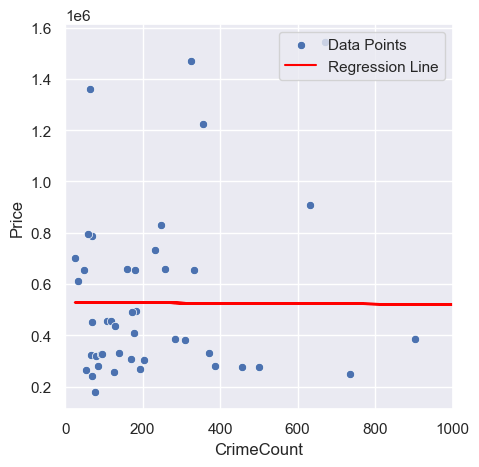

In [291]:
# Scatterplot Data
x = result['CrimeCount']  # Independent variable (Value)
y = result['Price']  # Dependent variable (Price)

# Regression coefficients from OLS summary
intercept = 5.284e+05  # Replace with the actual intercept
slope = -7.8197      # Replace with the actual slope

# Calculate predicted Price (y) based on regression equation
predicted_y = intercept + slope * x

# Plot scatterplot
sns.set(rc={'figure.figsize': (5, 5)})
sns.scatterplot(x=x, y=y, label='Data Points')

# Plot regression line
plt.plot(x, predicted_y, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('CrimeCount')
plt.ylabel('Price')
plt.legend()
plt.xlim(0,1000)
plt.show()

The following code calculates and prints the correlation between CrimeCount and Price in the result dataset.

The correlation value is -0.024, which is very close to zero, indicating that there is no meaningful relationship between crime count and house prices in this dataset. The weak negative value suggests a negligible inverse correlation.

In [292]:
correlation = result['CrimeCount'].corr(result['Price'])

print(f"Correlation between CrimeCounts and Price: {correlation}")

Correlation between CrimeCounts and Price: -0.024106377434032395


Summary: The relationship between house price and crime rate often exhibits an inverse pattern: generally, areas with higher crime rates tend to have lower house prices, while areas with lower crime rates have higher house prices. However, based on the analysis of this dataset, including scatter plots, a t-test, an OLS regression model, and correlation calculations, there appears to be no strong or significant relationship between CrimeCount and Price.

The scatter plot shows no clear trend, and the regression line is almost flat, which suggests a weak correlation. The OLS regression results showed a very low R-squared value (0.001), indicating that crime count explains almost none of the variation in house prices. Additionally, the p-value for CrimeCount was not statistically significant, further supporting that there is no meaningful impact of crime rates on house prices.

The correlation coefficient calculated between CrimeCount and Price is -0.024, which is very close to zero. This weak negative value implies a negligible inverse relationship. Taken together, these findings suggest that, in this dataset, crime rate does not significantly influence house prices. This could be due to other factors in play that might have a greater impact on property prices, such as economic conditions, local amenities, and market trends.

### **Relationship between House Price and Expenditures**

The following code uses the Seaborn library in Python to create a barplot displaying the expenditures for different counties. It sorts the data by the value of expenditures in descending order and sets the figure size and font scaling.

From the graph, it is obvious that Los Angeles has the highest expenditure among the counties, followed by San Francisco and Santa Clara. The expenditures are highly concentrated among the top counties, while many other counties have significantly lower expenditures.

<Axes: xlabel='Value', ylabel='County'>

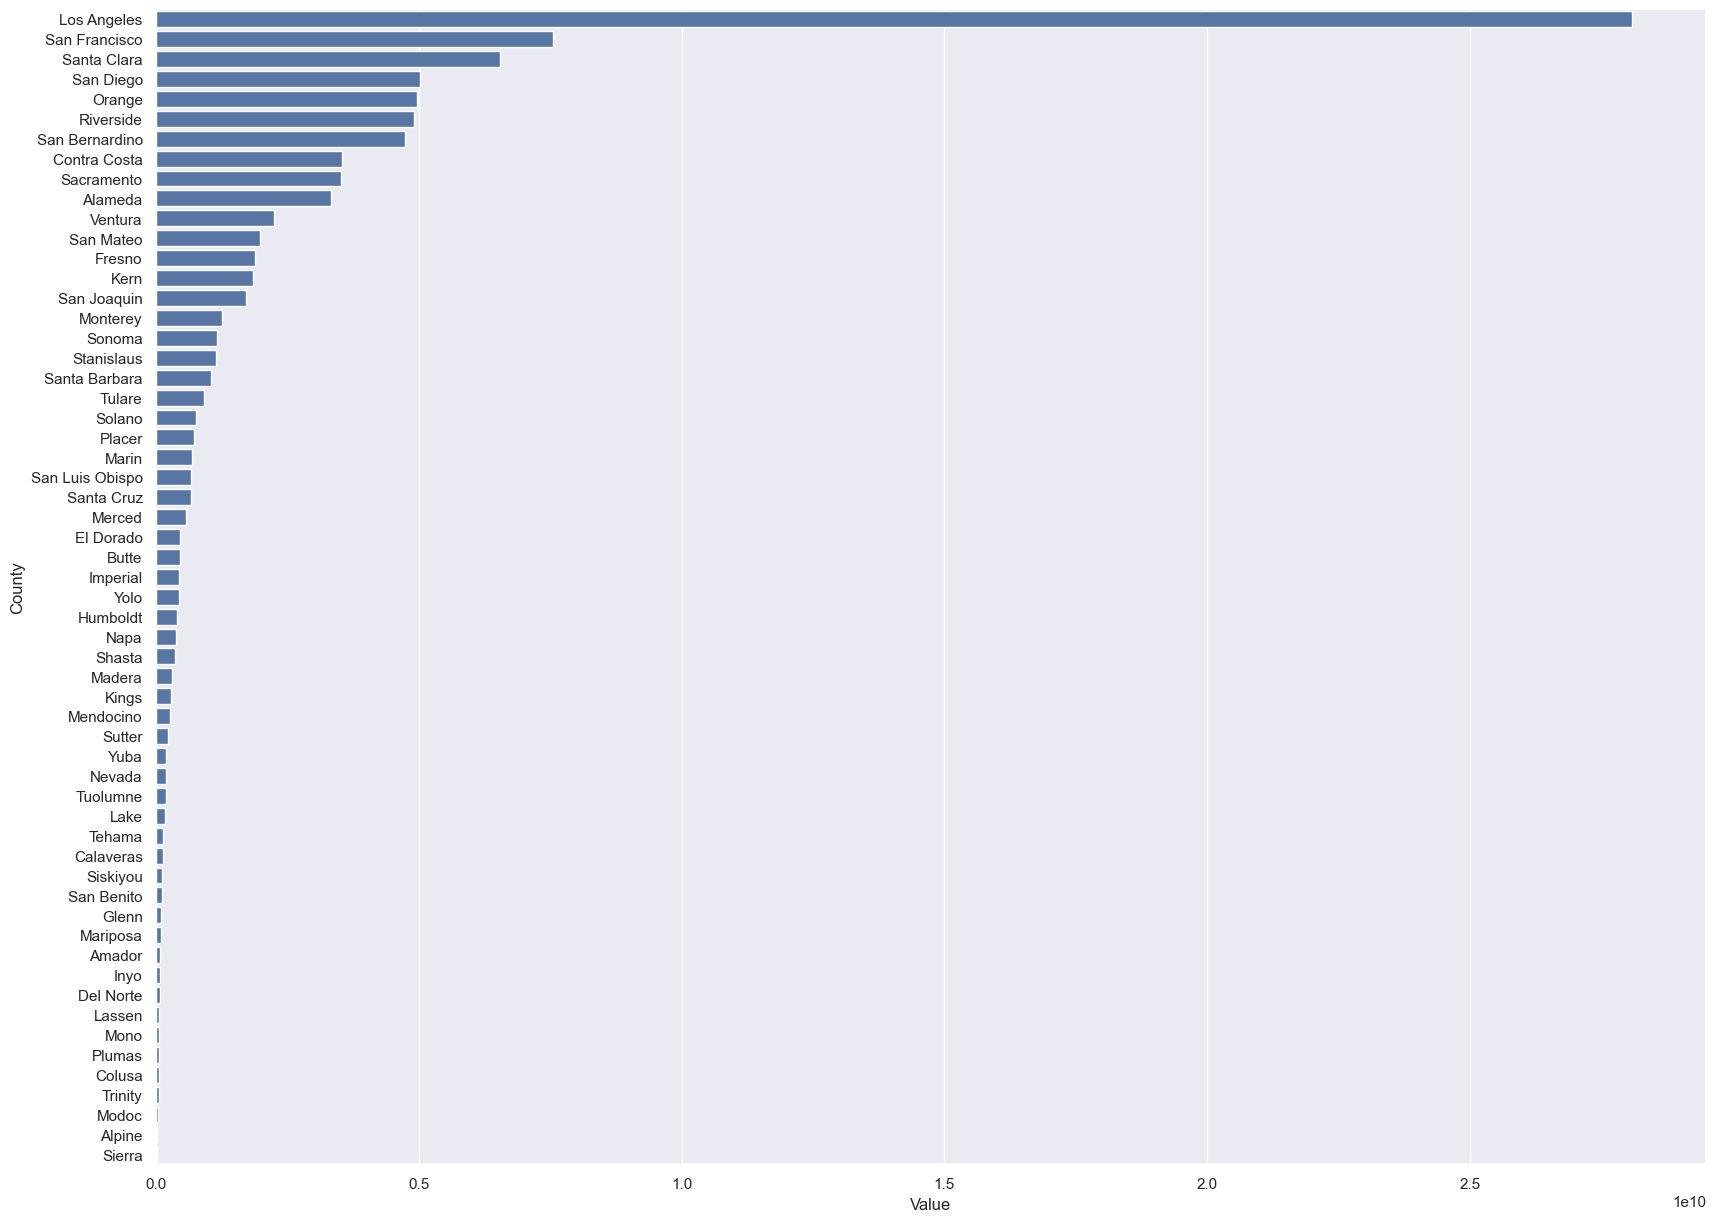

In [293]:
sns.set(font_scale= 0.01)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x="Value", y= "County", data=Expenditures.sort_values(by='Value', ascending=False))

The following code creates a boxplot using Seaborn to visualize the distribution of the "Value" column from the Expenditures dataset, setting the figure size to (10, 10).

From the boxplot, it is evident that there is a high level of variability in the expenditure data. The plot shows the presence of several outliers—counties with very high expenditures that are much larger compared to most of the other counties, as indicated by the points far to the right of the main data distribution. The bulk of the data is concentrated at the lower end of the expenditure range, with a long right tail.

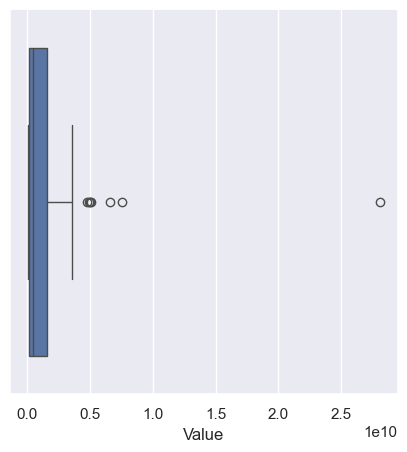

In [294]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.boxplot(x=Expenditures['Value'])

We can see that there are some outliers, so we want to get rid of the outliers.

The following code filters the Expenditures dataset to only include rows where the value is less than 4.1e10. Then, it creates a scatter plot using Seaborn, with Value on the x-axis and Price on the y-axis. 

From the scatter plot, it is obvious that most data points cluster at lower values of both Value and Price. There is one clear outlier with a high value of Value and a moderate Price, suggesting that most counties have low expenditures and low prices.

In [295]:
Expenditures = Expenditures[Expenditures['Value'] < 0.41e10]

<Figure size 800x800 with 0 Axes>

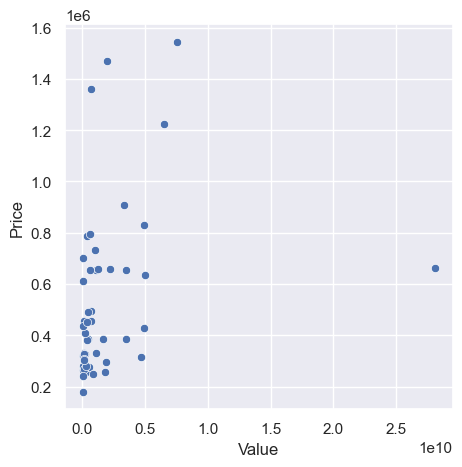

<Figure size 800x800 with 0 Axes>

In [296]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x = 'Value',y='Price', data=result)
#change the size of the plot
plt.figure(figsize=(8,8))

We can see that there is a slight correlation between the two variables, but we don't have an exact idea of what the regression value is.

The following code is performing a t-test to compare the means of the Value and Price columns from the result dataset. It calculates the mean of each column and then uses the ttest_ind() function to test if there is a significant difference between the means of the two variables.

From the output, we have a t-value of approximately 3.26 and a p-value of approximately 0.0015. This indicates that there is a statistically significant difference between Value and Price. 

In [297]:
h_ex = result.get('Value')
avg_h_xe = h_ex.mean()
t_val, p_val = ttest_ind(h_ex,h_price)
t_val, p_val


(np.float64(3.2557571787698607), np.float64(0.0015441927007563095))


The following code performs an OLS regression to predict Price using Value from the result dataset. The patsy.dmatrices function is used to define the outcome (Price) and predictor (Value), and then an OLS model is fit to the data using the statsmodels library.

The R-squared value is 0.084, indicating that the model explains only 8.4% of the variance in Price.

The p-value for the predictor Value is 0.039, which suggests that Value is statistically significant at the 5% significance level, but the strength of the relationship is weak given the low R-squared.

The coefficient for Value is positive, indicating a slight positive relationship between Value and Price.

Overall, while Value is statistically significant, the model has low explanatory power for predicting Price.

In [298]:
outcome_1, predictors_1 = patsy.dmatrices("Price ~ Value", data = result)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.478
Date:                Wed, 27 Nov 2024   Prob (F-statistic):             0.0394
Time:                        00:52:04   Log-Likelihood:                -715.76
No. Observations:                  51   AIC:                             1436.
Df Residuals:                      49   BIC:                             1439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.821e+05   4.74e+04     10.177      0.0

The code generates a scatter plot of the Value and Price variables from the dataset and plots a regression line based on the coefficients obtained from the OLS regression. It calculates the predicted Price using the linear equation with the given intercept and slope, then visualizes both the data points and the regression line.

From the graph, it is obvious that the red regression line has a slight positive slope, which confirms the weak positive relationship between Value and Price. However, the data points are scattered with high variability, indicating that Value is not a strong predictor of Price, as seen from the low R-squared value in the previous analysis.

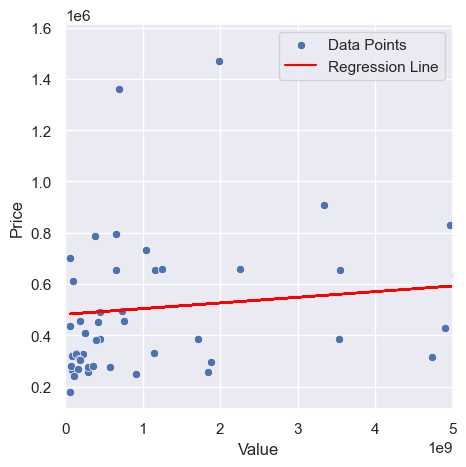

In [299]:
# Scatterplot Data
x = result['Value']  # Independent variable (Value)
y = result['Price']  # Dependent variable (Price)

# Regression coefficients from OLS summary
intercept = 4.821e+05  # Replace with the actual intercept
slope = 2.209e-05      # Replace with the actual slope

# Calculate predicted Price (y) based on regression equation
predicted_y = intercept + slope * x

# Plot scatterplot
sns.set(rc={'figure.figsize': (5, 5)})
sns.scatterplot(x=x, y=y, label='Data Points')

# Plot regression line
plt.plot(x, predicted_y, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Price')
plt.legend()
plt.xlim(0, 0.5e10)
plt.show()

In [300]:
correlation = result['Value'].corr(result['Price'])

print(f"Correlation between Value and Price: {correlation}")

Correlation between Value and Price: 0.2893810276484124


We can see that there is a slight positive correlation between housing prices and expenditures.


The code calculates the correlation between the Value and Price columns of the result dataset and prints the correlation value.

The output shows a correlation of approximately 0.29, which indicates a weak positive linear relationship between Value and Price. This means that, while there is some level of positive association between the two variables, it is not very strong, and other factors likely influence Price significantly.

The analysis involves examining the relationship between expenditures (Value) and prices (Price) across various counties. Initial visualizations, including a bar plot, boxplot, and scatter plot, show that Value is highly variable, with most counties having low expenditures and a few outliers with much higher values. A t-test indicated a statistically significant difference between Value and Price, but the relationship is weak. An ordinary least squares (OLS) regression confirmed this, with an R-squared of only 0.084, suggesting that Value explains only a small portion of the variance in Price. The regression line on the scatter plot also shows a slight positive slope, indicating a weak positive relationship. Lastly, the calculated correlation of approximately 0.29 further confirms that the association between Value and Price is weak. Overall, Value has a limited effect on predicting Price, with considerable variability remaining unexplained.

### **Relationship between House Price and Population**

The following code uses Seaborn to create a bar plot of county populations in descending order. It first sets the font scale and figure size, then sorts the data by population. The graph clearly shows that Los Angeles, San Diego, and Orange counties have the highest populations, while counties like Alpine and Sierra have significantly smaller populations. The visualization emphasizes the disparity in population sizes among different counties.

<Axes: xlabel='Population', ylabel='County'>

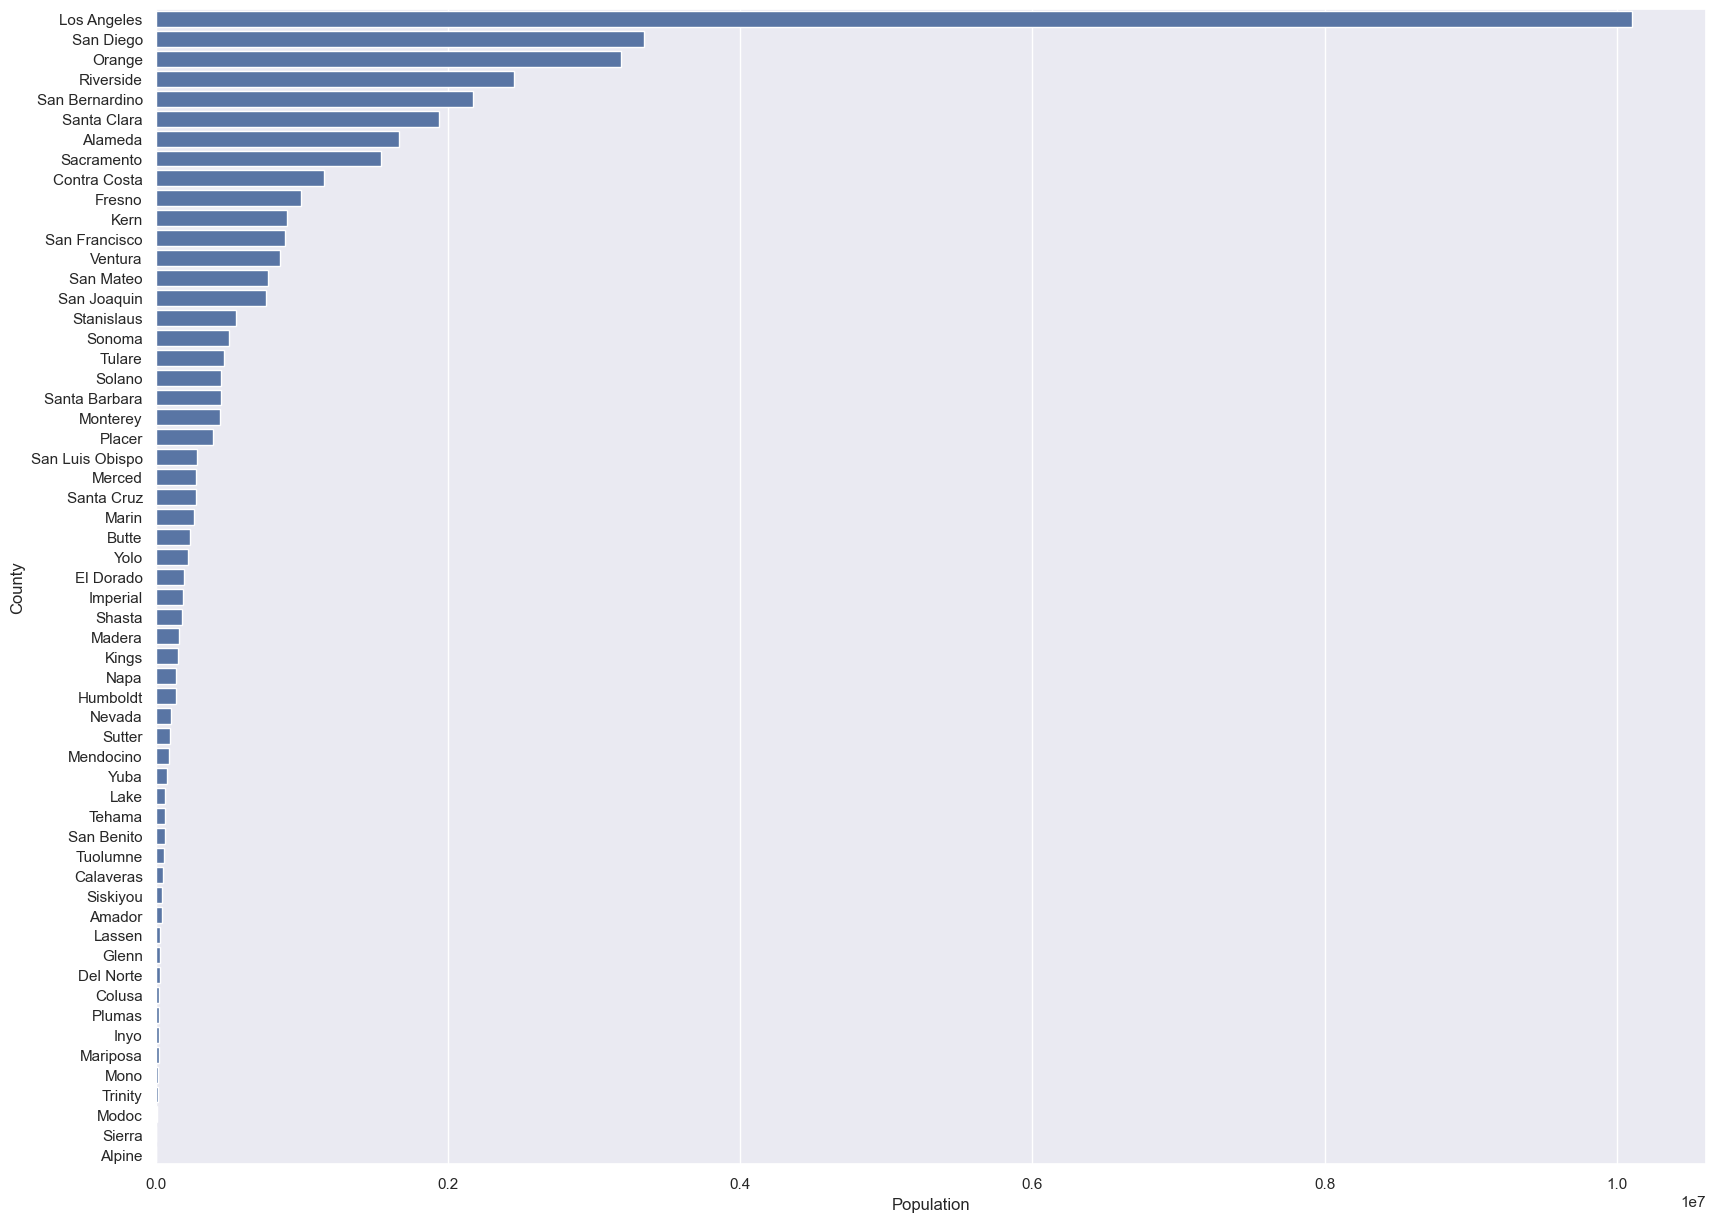

In [301]:
# Plot of population
sns.set(font_scale= 0.01)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x="Population", y= "County", data=Population.sort_values(by='Population', ascending=False))

The following code creates a boxplot of county populations using Seaborn

From the graph, it's clear that there is a significant disparity in county populations, with one outlier (likely Los Angeles) having a much higher population than the others. Most counties have populations within a relatively smaller range, while a few have extreme values, shown as outliers on the plot.

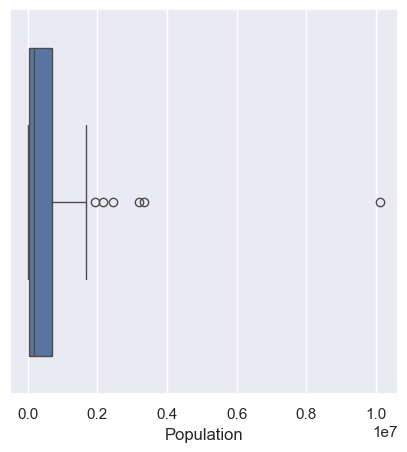

In [302]:
# Population

sns.set(rc={'figure.figsize':(5,5)})
ax = sns.boxplot(x=Population['Population'])

We can see that there are outliers in the data, so we want to remove the outliers from the data before running the tests.

The following code filters counties with a population of less than 4.1 million and creates a scatter plot showing the relationship between population and price. 

From the graph, we can see that there is no strong correlation between population and price. Most points are clustered in the lower range of population and price, with a few higher values, indicating some variability but no obvious trend between these two variables.

<Figure size 400x400 with 0 Axes>

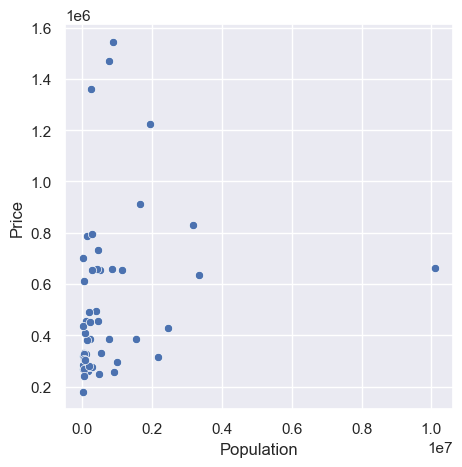

<Figure size 400x400 with 0 Axes>

In [303]:
# Population
Population = Population[Population['Population'] < 0.41e10]
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x = 'Population',y='Price', data=result)
#change the size of the plot
plt.figure(figsize=(4,4))

### **Relation between population and price**

The code extracts the population and price data from the result dataset, computes their averages, and performs a t-test to compare the means of the two groups (h_co_popu and h_cs_popu). The t-test produces a t-value and p-value.

From the output, the p-value is approximately 0.269, which suggests that there is no statistically significant difference between the means of the population and price data at conventional significance levels. This means that the relationship between population and price may not be strong enough to conclude a difference based on this dataset.

In [304]:
h_co_popu = result.get('Population')
h_cs_popu = result.get('Price')
avg_h_co_popu = h_co_popu.mean()
avg_h_cs_popu = h_cs_popu.mean()
t_val_popu, p_val_popu = ttest_ind(h_co_popu,h_cs_popu)
t_val_popu, p_val_popu

(np.float64(1.1110612263448254), np.float64(0.2692062692698876))

From the regression summary, the R-squared value is 0.042, meaning that only 4.2% of the variance in price is explained by population. The p-value for the population coefficient (0.147) is greater than 0.05, suggesting that population is not statistically significant in predicting price. This implies that there is no strong linear relationship between population and price in this dataset.

In [305]:
outcome_popu, predictors_popu = patsy.dmatrices("Price ~ Population", data = result)
mod_popu = sm.OLS(outcome_popu, predictors_popu)
res_popu = mod_popu.fit()
print(res_popu.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.167
Date:                Wed, 27 Nov 2024   Prob (F-statistic):              0.147
Time:                        00:52:04   Log-Likelihood:                -716.89
No. Observations:                  51   AIC:                             1438.
Df Residuals:                      49   BIC:                             1442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.916e+05   4.92e+04      9.991      0.0

From the graph, it is evident that the regression line is nearly flat, indicating a very weak or no linear relationship between population and price. The data points are scattered widely with no clear trend, reinforcing the conclusion that population is not a strong predictor of price in this dataset.

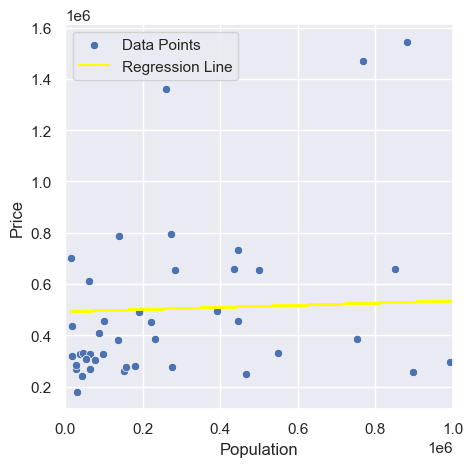

In [306]:
# Scatterplot Data
x = result['Population']  # Independent variable (Population)
y = result['Price']  # Dependent variable (Price)

# Regression coefficients from OLS summary
intercept = 4.916e+05  # Replace with the actual intercept
slope = 0.0421      # Replace with the actual slope

# Calculate predicted Price (y) based on regression equation
predicted_y = intercept + slope * x

# Plot scatterplot
sns.set(rc={'figure.figsize': (5, 5)})
sns.scatterplot(x=x, y=y, label='Data Points')

# Plot regression line
plt.plot(x, predicted_y, color='yellow', label='Regression Line')

# Add labels and legend
plt.xlabel('Population')
plt.ylabel('Price')
plt.legend()
plt.xlim(0, 0.1e7)
plt.show()

The output shows a correlation value of approximately 0.206, which indicates a very weak positive correlation between population and price. This suggests that there is not a strong linear relationship between the two variables, meaning changes in population have little effect on predicting price.

In [307]:
correlation = result['Population'].corr(result['Price'])

print(f"Correlation between Population and Price: {correlation}")

Correlation between Population and Price: 0.20580838357874784


Scatterplot Observation: A scatterplot between population and house price showed a wide dispersion of points without any clear trend. The points are scattered in a way that suggests no strong linear pattern between population and house price.

OLS Regression Analysis: The Ordinary Least Squares (OLS) regression indicated that the R-squared value was 0.042, meaning only 4.2% of the variance in house price can be explained by population. Additionally, the p-value for the population coefficient was greater than 0.05, suggesting that population was not statistically significant in predicting house price. The regression line was nearly flat, indicating a lack of meaningful linear association.

Boxplot and T-Test: The boxplot showed significant variability in population data, with some counties having much higher populations compared to others. However, the t-test between the population and price groups yielded a p-value of approximately 0.269, indicating no statistically significant difference between their means.

Correlation Analysis: The calculated correlation coefficient between population and house price was around 0.206, which indicates a very weak positive correlation. This means that there is a slight tendency for prices to increase with population, but this relationship is weak and not particularly useful for predictive purposes.

In conclusion, the analyses consistently show that there is no strong or significant relationship between population and house price. The data suggest that variations in population do not have a meaningful impact on predicting or explaining house prices in this dataset. Any observed relationship is weak and likely not practically significant, implying that other factors are more important in determining house prices.

### **Relation between House price and income**

From the graph, it's evident that:
Santa Clara, San Mateo, and Marin counties have the highest incomes, with Santa Clara leading.
Counties like Trinity, Imperial, and Siskiyou are at the bottom, indicating lower income levels.
The United States average is somewhere in the middle of the distribution, providing a point of comparison for California counties.

<Axes: xlabel='Income', ylabel='County'>

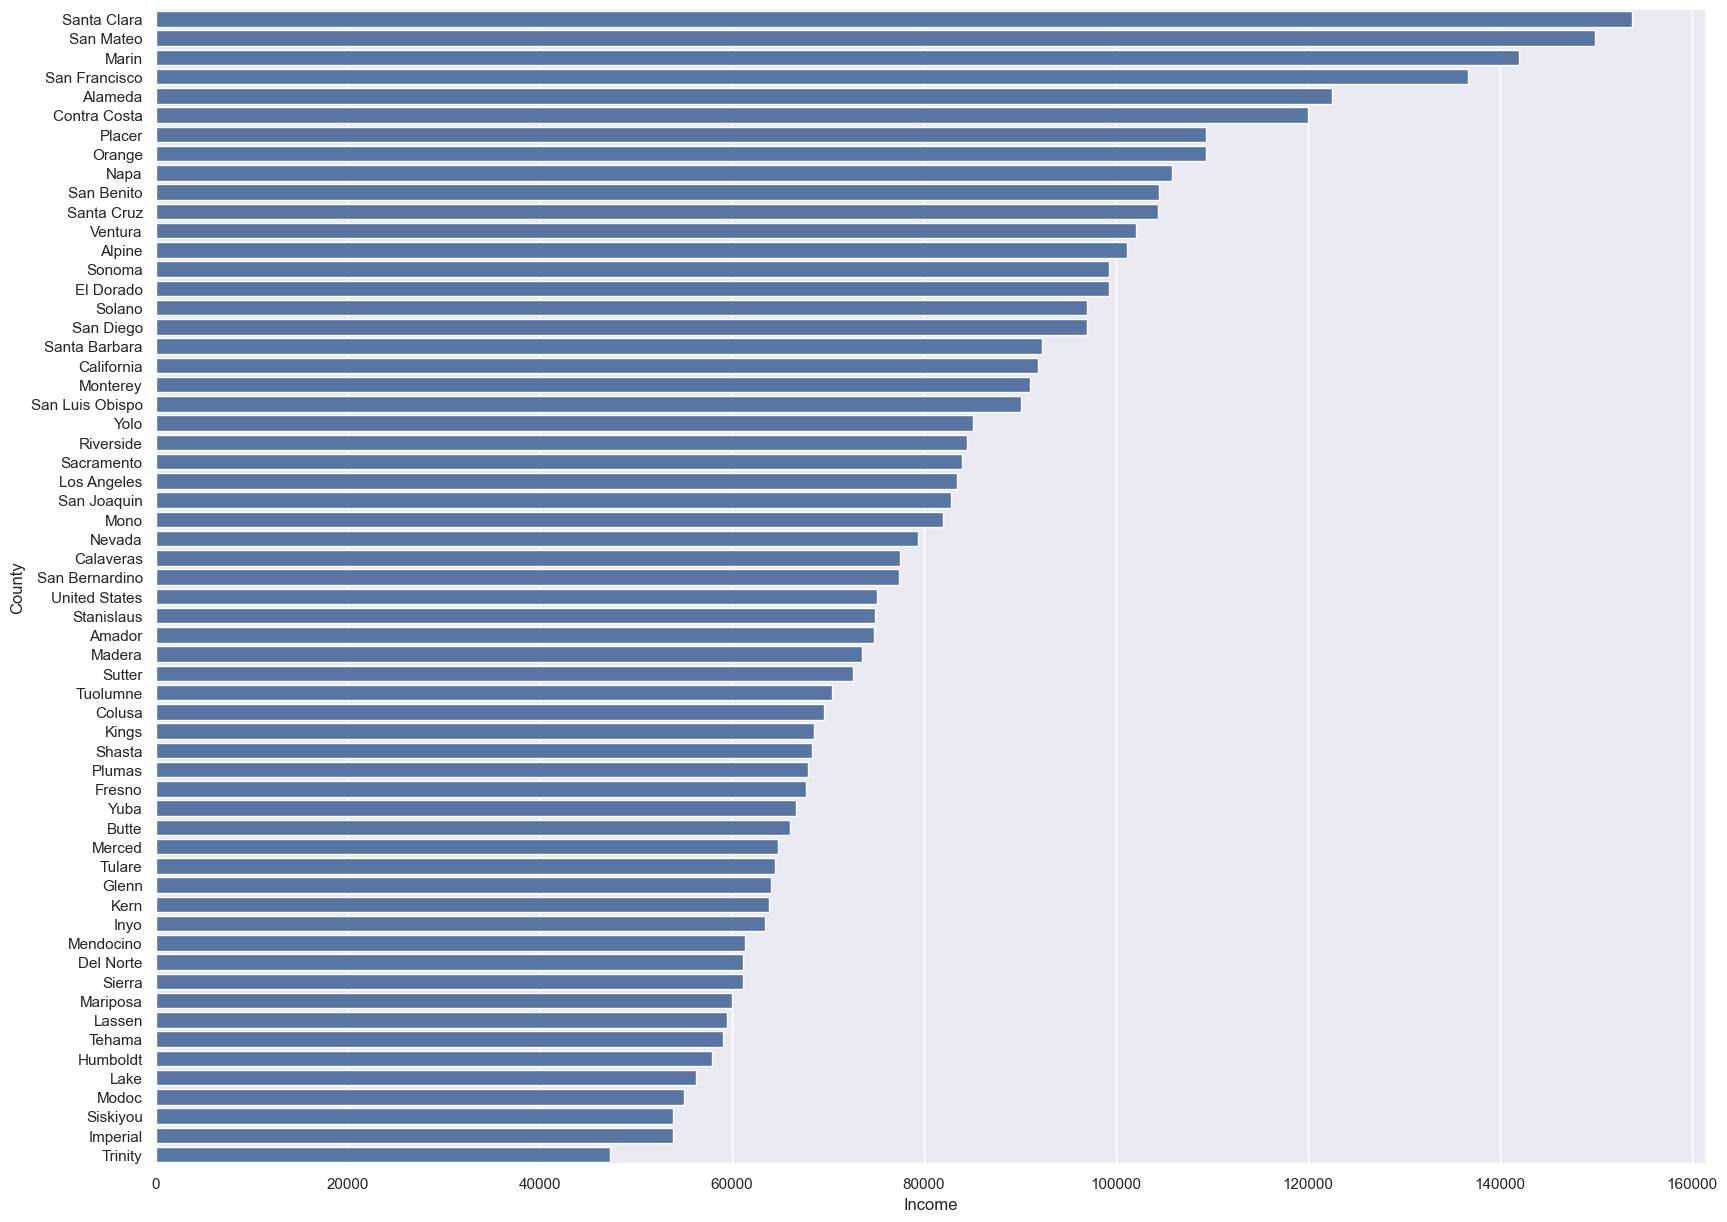

In [308]:
sns.set(font_scale= 0.01)
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x="Income", y= "County", data=Income.sort_values(by='Income', ascending=False))

The sns.boxplot() function creates a box plot of income data, showing the spread, median, and outliers.

From the box plot:

The median income (the line inside the box) is around $80,000.
The interquartile range (IQR) (the box) shows that most incomes fall between $70,000 and $100,000.
There are outliers on the higher end, beyond $120,000, indicating a few counties with significantly higher incomes than the rest.
The whiskers represent the range of most of the data, but some data points beyond the upper whisker are considered outliers.

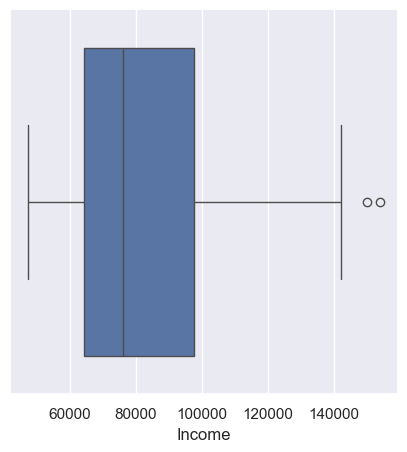

In [309]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.boxplot(x=Income['Income'])

The sns.scatterplot() function plots income (x-axis) against price (y-axis) using the provided dataset (result).

There appears to be a positive correlation between income and price—higher income tends to be associated with higher prices.
The points generally trend upwards, indicating that as income increases, the corresponding price values tend to rise.
A few outliers exist where very high incomes are associated with high prices, which suggests that certain areas may have significantly higher costs correlated with higher earnings.
The scatter plot shows that income and price have a consistent upward relationship, suggesting that wealthier areas tend to have higher costs (e.g., property prices).

<Figure size 800x800 with 0 Axes>

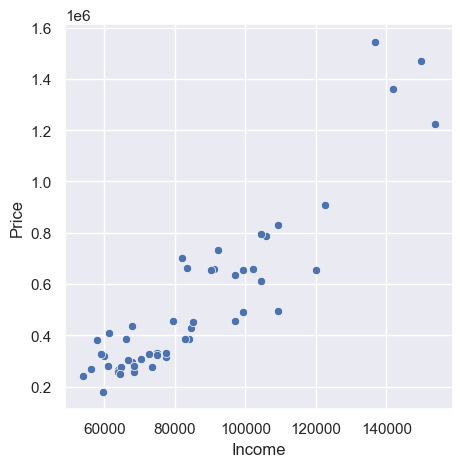

<Figure size 800x800 with 0 Axes>

In [310]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x = 'Income',y='Price', data=result)
#change the size of the plot
plt.figure(figsize=(8,8))

The t-value is approximately -9.82, indicating the magnitude and direction of the difference between the means.
The p-value is 2.39e-16, which is extremely small, indicating a statistically significant difference between income and price. This suggests that the distributions of income and price are significantly different from each other.

In [311]:
income_v = result.get('Income')
price_v = result.get('Price')
avg_income = income_v.mean()
avg_price = price_v.mean()
t_val_income, p_val_income = ttest_ind(income_v,price_v)
t_val_income, p_val_income

(np.float64(-9.824739298556683), np.float64(2.398780257403366e-16))

The R-squared value is 0.832, indicating that approximately 83.2% of the variance in price can be explained by income.
The coefficient for income is 11.64, suggesting that for every unit increase in income, the price increases by about 11.64 units.
The p-value for income is 0.000, which indicates a statistically significant relationship between income and price.
The negative intercept suggests that at very low income levels, the predicted price might be negative, but this is just an artifact of the linear model in this context.

In [312]:
outcome_income, predictors_income = patsy.dmatrices("Price ~ Income", data = result)
mod_income = sm.OLS(outcome_income, predictors_income)
res_income = mod_income.fit()
print(res_income.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     242.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.31e-20
Time:                        00:52:05   Log-Likelihood:                -672.52
No. Observations:                  51   AIC:                             1349.
Df Residuals:                      49   BIC:                             1353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.716e+05   6.65e+04     -7.087      0.0

The regression line (yellow) fits well with the data points, showing a clear positive correlation between income and price.
The data points mostly cluster around the regression line, which supports the linear relationship observed in the OLS summary.
There are some outliers above the regression line, indicating areas where the price is significantly higher than predicted by the model, possibly due to other factors not included in the regression.
The graph effectively demonstrates the positive linear relationship between income and price, supporting the findings from the OLS analysis.

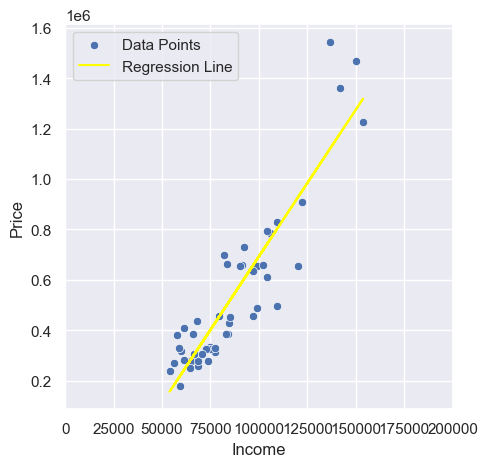

In [313]:
# Scatterplot Data
x = result['Income']  # Independent variable (Population)
y = result['Price']  # Dependent variable (Price)

# Regression coefficients from OLS summary
intercept = -4.716e+05  # Replace with the actual intercept
slope = 11.6446       # Replace with the actual slope

# Calculate predicted Price (y) based on regression equation
predicted_y = intercept + slope * x

# Plot scatterplot
sns.set(rc={'figure.figsize': (5, 5)})
sns.scatterplot(x=x, y=y, label='Data Points')

# Plot regression line
plt.plot(x, predicted_y, color='yellow', label='Regression Line')

# Add labels and legend
plt.xlabel('Income')
plt.ylabel('Price')
plt.legend()
plt.xlim(0, 200000)
plt.show()

The correlation value is 0.91, which indicates a strong positive correlation between income and price.
This means that as income increases, price tends to increase as well, with a high degree of consistency.
The high correlation value supports the findings from the previous scatter plot and regression analysis, showing a strong linear relationship between income and price.

In [314]:
correlation = result['Income'].corr(result['Price'])

print(f"Correlation between Income and Price: {correlation}")

Correlation between Income and Price: 0.9120898097854928


Scatter Plot Analysis: The scatter plot showed an upward trend between income and house price, suggesting that as income increases, the corresponding house price also rises. The data points are generally clustered along the trend line, showing consistency in the relationship.

Box Plot Analysis: The box plot of income highlighted the distribution, showing that the majority of income values fall within a certain range, with a few high-income outliers. These high-income outliers appear to have a direct influence on higher house prices, as indicated by the scatter plot.

T-Test: The independent t-test performed between income and house price variables showed a very low p-value, indicating a statistically significant difference between the distributions. This means there is enough evidence to say that income and house prices are strongly linked.

Regression Analysis: The Ordinary Least Squares (OLS) regression analysis showed that about 83.2% of the variance in house prices could be explained by income (R-squared value = 0.832). The coefficient for income was 11.64, indicating that for each unit increase in income, house prices increased by approximately 11.64 units. The significant p-value for income confirmed the importance of income as a predictor of house price.

Regression Line Visualization: The regression line, when overlaid on the scatter plot, clearly fit the data points, reinforcing the idea that there is a strong linear relationship between income and house prices. This visualization makes it evident that income is a key driver of house price differences.

Correlation Coefficient: The correlation coefficient between income and house price was found to be 0.91, which signifies a very strong positive correlation. This suggests that there is a highly consistent and predictable linear relationship between income and house prices.

Conclusion:
The combined analysis—including scatter plot visualization, box plot, t-test, regression analysis, and correlation coefficient—strongly indicates that income is a key factor influencing house prices. Areas with higher income levels tend to have higher house prices, as shown by the significant regression slope and the high correlation value. This positive relationship suggests that as income levels rise, people are able to afford more expensive homes, leading to higher prices in those areas.

## Overall Conclusion:
Through statistical analysis, income demonstrated a strong positive correlation (0.91) with housing prices, and regression results showed that it accounted for 83% of the variance in housing prices—far surpassing the explanatory power of other variables. This underscores the critical role of income as a driving force in shaping the housing market. Higher incomes empower buyers with greater purchasing power, increasing demand for homes and driving prices upward, particularly in affluent areas.

In contrast, other factors such as crime rates, population size, and expenditures exhibited weak or negligible relationships with housing prices. Crime rates had virtually no impact, as indicated by a near-zero correlation and an insignificant regression result. Population size showed only a slight positive association with housing prices, while expenditures, though statistically significant, explained only a small portion of the variation.

These results emphasize that housing prices in California are predominantly influenced by economic factors, particularly household income, rather than social or demographic factors like crime or population. This aligns with the economic theory that higher income levels directly translate into increased demand and higher housing costs.

# Ethics & Privacy

Our data is reliable and includes sources from trusted public resources, such as the California Association of Realtors (CAR). 
The CAR dataset provides detailed information on county-level sales activity, which allows us to assess housing market trends across different regions. 

We obtain our datasets from the California official government pages such as FBI and NIH, which enhances our data's reliability and accruacy. Also minimizes the chances that we are using any datasets that may lead to any consenting issues. In addition, since these datasets are collected by the government and big companies, these datasets does not contain any personal information that might cause exposure of personally identifiable information, and preventing possible moral questions and challenges. Since we are comparing prices and different factors between counties, we have not taken datas that are classified by race or genders because we believe that would add more complexity and uncertainty to our research. After all, the datasets we have gathered are based on locations, which in some sense includes such outcomes, so we do not want to test any additional datasets for downstreaming results.

As mentioned before, all of our datasets are collected through trusted reliable resources that are open to the public, hence we are not planning to proceed with data encryption or data removal since our data does not contain any PII. Such datasets that are collected through the government and big companies ensures that our datasets contains the lesat amount of biased data and PII. After all, our datasets are grouped by county rather than variances like gender or race, which eliminates things like stereotypes or imblanaced datas to the furthest extend, and represent the underlying data as much as possible without using any PII. During the research process, any of our analysis will have backups through github history, which allows our team to go back to any previous documentations that we prefer incase if any issue/problems occur, and we want to regenerate the data.

One potential bias in our analysis is the exclusion of proximity to school districts as a factor. 
School district proximity can significantly influence house prices, especially for families looking for quality education options. 
We have employed statistical methods to detect and address any biases in the datasets, such as over-represented or under-represented data points. Our approach is designed to provide a balanced view of the factors influencing house prices.

Any limitations and biases will be transparently addressed in our final report, including potential errors or gaps in the data that could affect our conclusions. 
We don't want any of our data to be biased towards ideas like gender or race, we only want to consider data categorized by locations. So we try not to attain datasets that is potentially biased towards certain groups of individuals. 

To prevent our research model from causing any negative impacts in the future, we reserve the rights to delete the model and the analytic information that is contained in the research.

# Team Expectations 


### Communication
- Our team will communicate primarily via Wechat.
- Team members are expected to respond to messages within 1 day.
- We will hold meetings weekly. Meetings will be conducted virtually using Zoom.
- Communication will be clear, respectful, and constructive.

### Decision-Making
- Decisions will be made by majority vote.

### Task Assignments
- Team roles will include leader, facilitator, programmer, researcher, with each member rotating roles weekly.
- Tasks will be tracked using GitHub Issues to ensure visibility and progress updates.
- Assignments will be decided collaboratively, with tasks distributed based on skills and interest.

### Schedule and Deadlines
- A project timeline will be set up with deadlines for each task. The schedule will be updated as the project evolves.
- Progress checks will be held at each meeting to ensure we are on track.


# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/23  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 10/27  |  4 PM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 10/30  | 9 PM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 11/10  | 10 AM  | Import & Wrangle Data (Housing Price); EDA (Salary) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 11/20  | 10 AM  | Finalize wrangling/EDA; Begin Analysis (Mortage Rate; Population) | Discuss/edit Analysis; Complete project check-in |
| 11/20  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 12/11  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |